In [34]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import networkx as nx
from typing import List, Dict, Tuple, Union

# Add the scripts directory to the path
scripts_dir = Path("..") / "scripts"
sys.path.append(str(scripts_dir.resolve()))

from network import clean_author_names, analyze_coauthorship_network, analyze_author_count_distribution, visualize_top_authors_network
from last_author_analysis import *

%reload_ext autoreload
%autoreload 2

In [8]:
df = pd.read_parquet('../data/processed/arxiv_scientific_dataset_final.parquet')
display(df)

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count,...,title_count,author_count_boxcox,title_count_sqrt,published_year,published_quarter,published_month,updated_year,updated_quarter,updated_month,year_period
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79,...,2,0.000000,1.414214,1993,1993Q3,1993-08,1993,1993Q3,1993-08,1990s
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119,...,12,0.000000,3.464102,1993,1993Q3,1993-08,1993,1993Q3,1993-08,1990s
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,1993-09-01,1993-09-01,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167,...,7,0.715010,2.645751,1993,1993Q3,1993-09,1993,1993Q3,1993-09,1990s
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174,...,8,1.154208,2.828427,1993,1993Q4,1993-11,1993,1993Q4,1993-11,1990s
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187,...,8,0.715010,2.828427,1993,1993Q4,1993-11,1993,1993Q4,1993-11,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112516,abs-2501.18184v1,Genetic Algorithm with Border Trades (GAB),Machine Learning,cs.LG,2025-01-30,2025-01-30,['Qingchuan Lyu'],'Qingchuan Lyu',This paper introduces a novel approach to impr...,74,...,6,0.000000,2.449490,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s
112517,abs-2501.18280v1,Jailbreaking LLMs' Safeguard with Universal Ma...,Computation and Language (Natural Language Pro...,cs.CL,2025-01-30,2025-01-30,"['Haoyu Liang', 'Youran Sun', 'Yunfeng Cai', '...",'Haoyu Liang',The security issue of large language models (L...,150,...,11,1.730617,3.316625,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s
108722,abs-2405.20132v4,LLaMEA: A Large Language Model Evolutionary Al...,Neural and Evolutionary Computing,cs.NE,2024-05-30,2025-01-30,"['Niki van Stein', 'Thomas Bäck']",'Niki van Stein',Large Language Models (LLMs) such as GPT-4 hav...,177,...,11,0.715010,3.316625,2024,2024Q2,2024-05,2025,2025Q1,2025-01,2020s
112519,abs-2501.18504v1,CLEAR: Cue Learning using Evolution for Accura...,Computer Vision and Pattern Recognition,cs.CV,2025-01-30,2025-01-30,"['Peter J. Bentley', 'Soo Ling Lim', 'Fuyuki I...",'Peter J. Bentley',Large Language Model (LLM) image recognition i...,170,...,13,1.154208,3.605551,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s


# Conclusions

It is possible to create a network and find highly influential authors. However, it is difficult to tell if these are truly meaningful. For example, it is very easy for someone to write a lot of papers and submit them to ArXiv, but it doesn't mean people are reading them. 

Data that would be useful to add:
* Papers that went on to be published in a peer-reviewed journal
* Papers that were cited in other papers

# Clean author names

Some authors are full names and some are initials. It is hard to go from initials to full names, so let's clean this to make everyone initials + last name. 

In [9]:
clean_df=clean_author_names(df)
display(clean_df)

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count,...,title_count,author_count_boxcox,title_count_sqrt,published_year,published_quarter,published_month,updated_year,updated_quarter,updated_month,year_period
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,[M. L. Ginsberg],M. L. Ginsberg,Because of their occasional need to return to ...,79,...,2,0.000000,1.414214,1993,1993Q3,1993-08,1993,1993Q3,1993-08,1990s
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,[M. P. Wellman],M. P. Wellman,Market price systems constitute a well-underst...,119,...,12,0.000000,3.464102,1993,1993Q3,1993-08,1993,1993Q3,1993-08,1990s
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,1993-09-01,1993-09-01,"[I. P. Gent, T. Walsh]",I. P. Gent,We describe an extensive study of search in GS...,167,...,7,0.715010,2.645751,1993,1993Q3,1993-09,1993,1993Q3,1993-09,1990s
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"[F. Bergadano, D. Gunetti, U. Trinchero]",F. Bergadano,As real logic programmers normally use cut (!)...,174,...,8,1.154208,2.828427,1993,1993Q4,1993-11,1993,1993Q4,1993-11,1990s
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"[J. C. Schlimmer, L. A. Hermens]",J. C. Schlimmer,To support the goal of allowing users to recor...,187,...,8,0.715010,2.828427,1993,1993Q4,1993-11,1993,1993Q4,1993-11,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112516,abs-2501.18184v1,Genetic Algorithm with Border Trades (GAB),Machine Learning,cs.LG,2025-01-30,2025-01-30,[Q. Lyu],Q. Lyu,This paper introduces a novel approach to impr...,74,...,6,0.000000,2.449490,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s
112517,abs-2501.18280v1,Jailbreaking LLMs' Safeguard with Universal Ma...,Computation and Language (Natural Language Pro...,cs.CL,2025-01-30,2025-01-30,"[H. Liang, Y. Sun, Y. Cai, J. Zhu, B. Zhang]",H. Liang,The security issue of large language models (L...,150,...,11,1.730617,3.316625,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s
108722,abs-2405.20132v4,LLaMEA: A Large Language Model Evolutionary Al...,Neural and Evolutionary Computing,cs.NE,2024-05-30,2025-01-30,"[N.V. Stein, T. Bäck]",N.V. Stein,Large Language Models (LLMs) such as GPT-4 hav...,177,...,11,0.715010,3.316625,2024,2024Q2,2024-05,2025,2025Q1,2025-01,2020s
112519,abs-2501.18504v1,CLEAR: Cue Learning using Evolution for Accura...,Computer Vision and Pattern Recognition,cs.CV,2025-01-30,2025-01-30,"[P.J. Bentley, S.L. Lim, F. Ishikawa]",P.J. Bentley,Large Language Model (LLM) image recognition i...,170,...,13,1.154208,3.605551,2025,2025Q1,2025-01,2025,2025Q1,2025-01,2020s


In [10]:
print(f"Number unique first authors before cleaning: {len(df['first_author'].unique())}")
print(f"Number unique first authors after cleaning: {len(clean_df['first_author'].unique())}")

Number unique first authors before cleaning: 77733
Number unique first authors after cleaning: 51929


In [14]:
analysis_results=analyze_author_count_distribution(clean_df, 'author_count')


Author count statistics:
count    136160.000000
mean          3.977894
std           4.233442
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
90%           7.000000
95%           8.000000
99%          12.000000
max        1137.000000
Name: author_count, dtype: float64


/Users/deannachurch/local_docs/Springboard/Capstone3/scripts/network.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  



Percentage of papers by author count:
1 authors: 7.49%
2 authors: 18.74%
3 authors: 23.29%
4 authors: 19.25%
5 authors: 12.87%
6 authors: 8.10%
7 authors: 4.44%
8 authors: 2.40%
9 authors: 1.27%
10 authors: 0.73%
11 authors: 0.38%
12 authors: 0.28%
13 authors: 0.17%
14 authors: 0.11%
15 authors: 0.08%
16 authors: 0.06%
17 authors: 0.05%
18 authors: 0.03%
19 authors: 0.02%
20 authors: 0.02%

Cumulative distribution:
Papers with more than 1 authors: 92.51%
Papers with more than 2 authors: 73.77%
Papers with more than 3 authors: 50.48%
Papers with more than 5 authors: 18.36%
Papers with more than 10 authors: 1.42%
Papers with more than 20 authors: 0.20%
Papers with more than 50 authors: 0.02%
Papers with more than 100 authors: 0.01%

Collaboration patterns:
Single author papers: 7.49%
Small teams (2-5 authors): 74.15%
Medium teams (6-20 authors): 18.16%
Large teams (21-100 authors): 0.20%
Mega-collaborations (>100 authors): 0.01%


In [5]:
# Debug helper to find problematic author entries
problem_rows = []
for i, row in clean_df.iterrows():
    try:
        if 'authors' in row and isinstance(row['authors'], str):
            authors = [author.strip() for author in row['authors'].split(',')]
            # Check for duplicates or empty names
            if len(set(authors)) != len(authors) or '' in authors:
                problem_rows.append((i, row['authors']))
    except Exception as e:
        problem_rows.append((i, f"Error: {e}"))

if problem_rows:
    print(f"Found {len(problem_rows)} potentially problematic rows:")
    for idx, row in problem_rows[:10]:  # Show first 10
        print(f"Row {idx}: {row}")

# Generate network information

In [16]:
# Run the full analysis
graph, influence = analyze_coauthorship_network(
    clean_df, 
    author_column='authors',
    centrality_metrics=['degree', 'eigenvector', 'pagerank'],
    top_n=10,
    visualize=False
)

Starting co-authorship network analysis on 136160 records...


Building network: 100%|██████████| 136160/136160 [00:07<00:00, 17227.98it/s]


Network created with 125888 authors and 1573233 connections
Network density: 0.000199
Number of connected components: 6782
Size of largest component: 108912 authors

Top 10 Authors by Degree Centrality:
1. Y. Wang: 0.0357
2. Y. Zhang: 0.0333
3. Y. Li: 0.0324
4. Y. Liu: 0.0296
5. Z. Wang: 0.0282
6. S. Wang: 0.0267
7. X. Wang: 0.0261
8. J. Li: 0.0258
9. J. Zhang: 0.0250
10. X. Li: 0.0250

Top 10 Authors by Eigenvector Centrality:
1. Y. Wang: 0.0323
2. Y. Zhang: 0.0323
3. Y. Li: 0.0321
4. Y. Liu: 0.0319
5. S. Wang: 0.0319
6. X. Wang: 0.0319
7. Z. Wang: 0.0319
8. J. Li: 0.0318
9. X. Li: 0.0317
10. J. Zhang: 0.0317

Top 10 Authors by Pagerank Centrality:
1. Y. Wang: 0.0016
2. Y. Zhang: 0.0014
3. Y. Li: 0.0013
4. Y. Liu: 0.0012
5. Z. Wang: 0.0010
6. Y. Chen: 0.0010
7. X. Wang: 0.0009
8. X. Li: 0.0009
9. J. Li: 0.0009
10. J. Wang: 0.0009

Comparison of Top 10 Authors Across Centrality Measures:
Degree               | Eigenvector          | Pagerank            
--------------------------------

Author count statistics:
count    136160.000000
mean          3.977894
std           4.233442
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
90%           7.000000
95%           8.000000
99%          12.000000
max        1137.000000
Name: author_count, dtype: float64


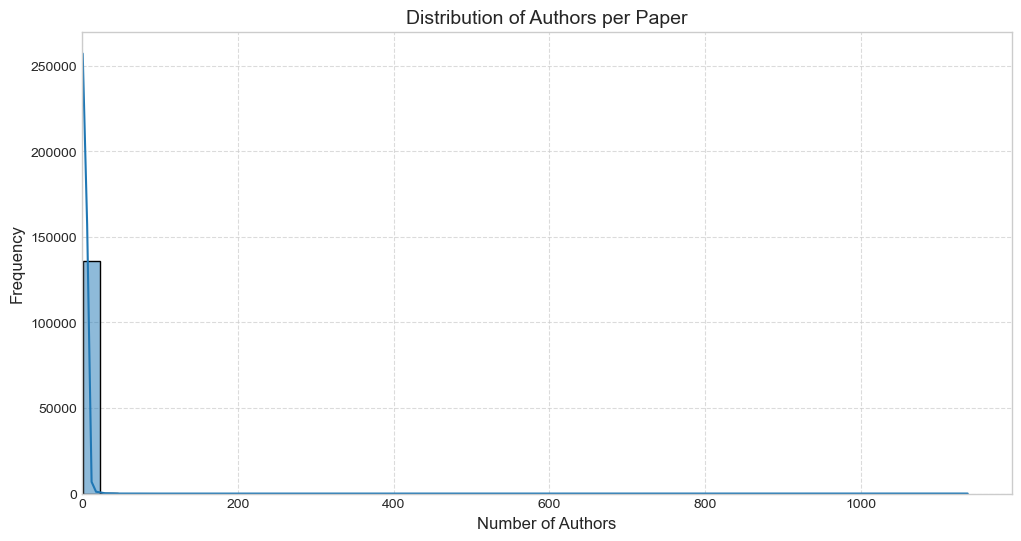

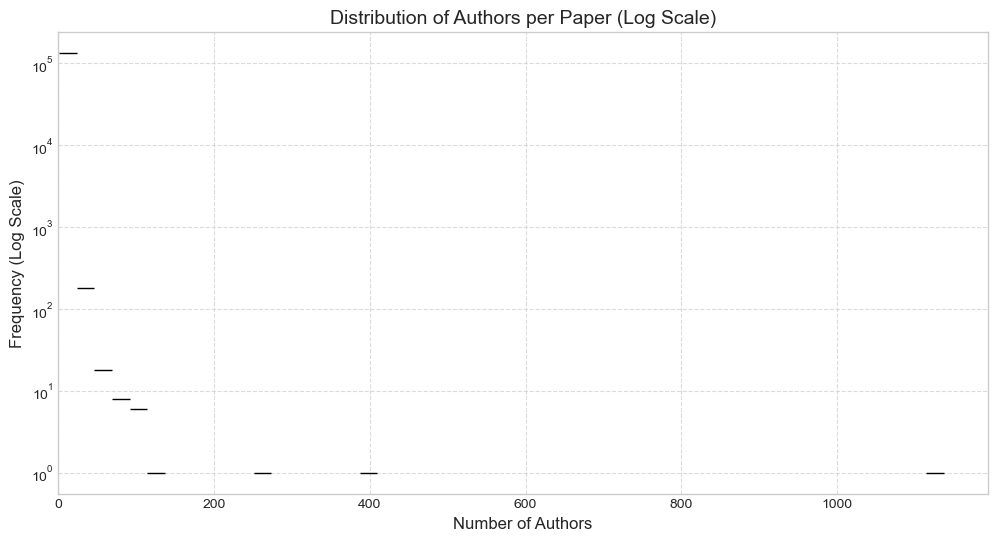

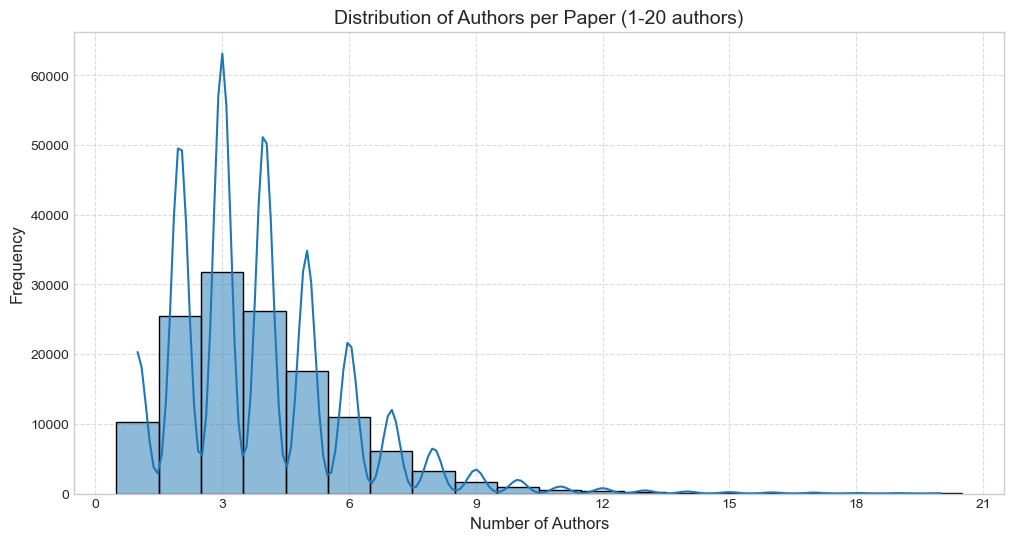

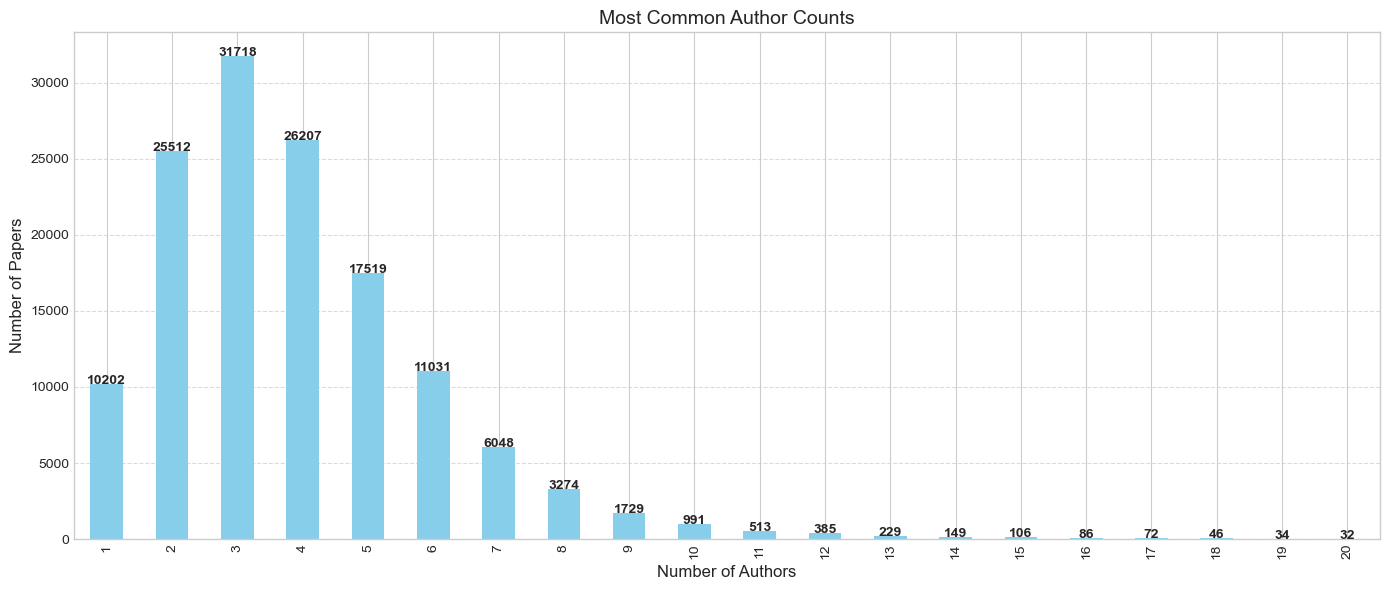

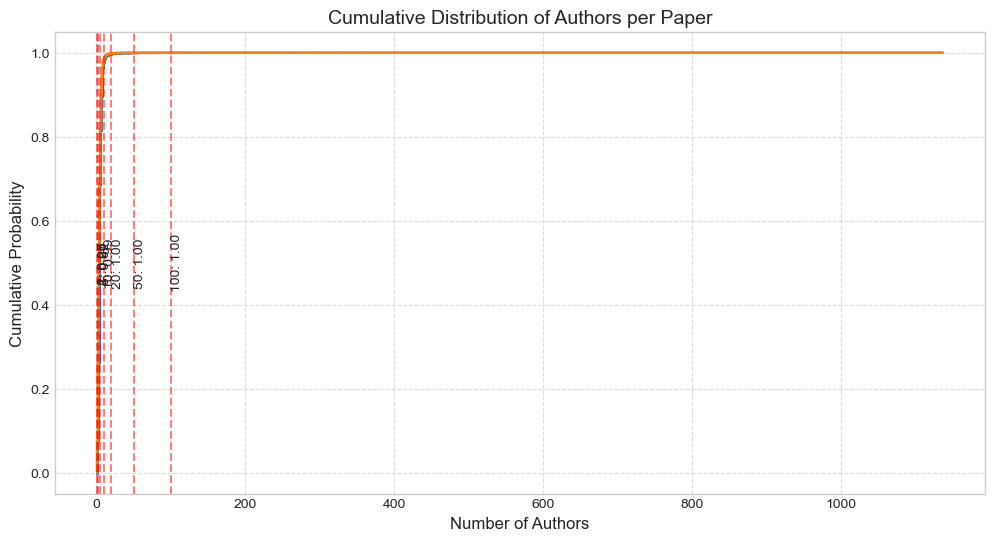

/Users/deannachurch/local_docs/Springboard/Capstone3/scripts/network.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.1, f"{v}\n({team_percents[i]:.1f}%)", ha='center', fontweight='bold')


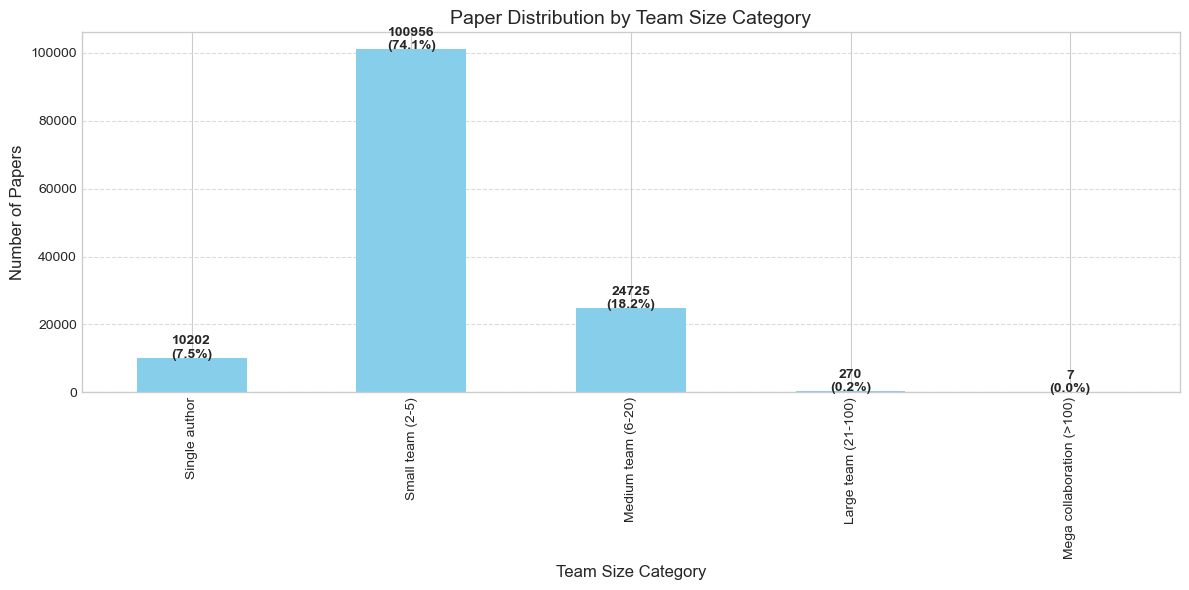


Percentage of papers by author count:
1 authors: 7.49%
2 authors: 18.74%
3 authors: 23.29%
4 authors: 19.25%
5 authors: 12.87%
6 authors: 8.10%
7 authors: 4.44%
8 authors: 2.40%
9 authors: 1.27%
10 authors: 0.73%
11 authors: 0.38%
12 authors: 0.28%
13 authors: 0.17%
14 authors: 0.11%
15 authors: 0.08%
16 authors: 0.06%
17 authors: 0.05%
18 authors: 0.03%
19 authors: 0.02%
20 authors: 0.02%

Cumulative distribution:
Papers with more than 1 authors: 92.51%
Papers with more than 2 authors: 73.77%
Papers with more than 3 authors: 50.48%
Papers with more than 5 authors: 18.36%
Papers with more than 10 authors: 1.42%
Papers with more than 20 authors: 0.20%
Papers with more than 50 authors: 0.02%
Papers with more than 100 authors: 0.01%

Collaboration patterns:
Single author papers: 7.49%
Small teams (2-5 authors): 74.15%
Medium teams (6-20 authors): 18.16%
Large teams (21-100 authors): 0.20%
Mega-collaborations (>100 authors): 0.01%


In [17]:
analysis_results = analyze_author_count_distribution(clean_df, 'author_count')

In [19]:
display(clean_df[clean_df['author_count'] > 100])

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count,...,title_count,author_count_boxcox,title_count_sqrt,published_year,published_quarter,published_month,updated_year,updated_quarter,updated_month,year_period
103173,abs-1807.02876v3,Machine Learning in High Energy Physics Commun...,Computational Physics,physics.comp-ph,2018-07-08,2019-05-16,"[K. Albertsson, P. Altoe, D. Anderson, J. Ande...",K. Albertsson,Machine learning has been applied to several p...,141,...,9,6.070519,3.000000,2018,2018Q3,2018-07,2019,2019Q2,2019-05,2010s
57487,abs-1901.04056v2,The Liver Tumor Segmentation Benchmark (LiTS),Computer Vision and Pattern Recognition,cs.CV,2019-01-13,2022-11-25,"[P. Bilic, P. Christ, H.B. Li, E. Vorontsov, A...",P. Bilic,"In this work, we report the set-up and results...",235,...,6,5.824648,2.449490,2019,2019Q1,2019-01,2022,2022Q4,2022-11,2010s
124846,abs-2211.05100v4,BLOOM: A 176B-Parameter Open-Access Multilingu...,Computation and Language (Natural Language Pro...,cs.CL,2022-11-09,2023-06-27,"[B. Workshop, :, T.L. Scao, A. Fan, C. Akiki, ...",B. Workshop,Large language models (LLMs) have been shown t...,143,...,7,7.893072,2.645751,2022,2022Q4,2022-11,2023,2023Q2,2023-06,2020s
135524,abs-2403.08295v4,Gemma: Open Models Based on Gemini Research an...,Computation and Language (Natural Language Pro...,cs.CL,2024-03-13,2024-04-16,"[G. Team, T. Mesnard, C. Hardin, R. Dadashi, S...",G. Team,"This work introduces Gemma, a family of lightw...",114,...,9,5.810652,3.000000,2024,2024Q1,2024-03,2024,2024Q2,2024-04,2020s
22172,abs-2311.18259v4,Ego-Exo4D: Understanding Skilled Human Activit...,Computer Vision and Pattern Recognition,cs.CV,2023-11-30,2024-09-25,"[K. Grauman, A. Westbury, L. Torresani, K. Kit...",K. Grauman,"We present Ego-Exo4D, a diverse, large-scale m...",156,...,10,5.709234,3.162278,2023,2023Q4,2023-11,2024,2024Q3,2024-09,2020s
23282,abs-2403.05530v5,Gemini 1.5: Unlocking multimodal understanding...,Computation and Language (Natural Language Pro...,cs.CL,2024-03-08,2024-12-16,"[G. Team, P. Georgiev, V.I. Lei, R. Burnell, L...",G. Team,"In this report, we introduce the Gemini 1.5 fa...",240,...,11,9.786598,3.316625,2024,2024Q1,2024-03,2024,2024Q4,2024-12,2020s
9100,abs-2412.16720v1,OpenAI o1 System Card,Artificial Intelligence,cs.AI,2024-12-21,2024-12-21,"[OpenAI, :, A. Jaech, A. Kalai, A. Lerer, A. R...",OpenAI,The o1 model series is trained with large-scal...,149,...,4,7.216733,2.000000,2024,2024Q4,2024-12,2024,2024Q4,2024-12,2020s


# Outliers
These 7 papers may be scewing network significantly. Let's remove these and try again.

In [20]:
clean_no_mega_df=clean_df[clean_df['author_count']<100]
print(f"Clean df shape: {clean_df.shape}")
print(f"Clean_no_mega df shape: {clean_no_mega_df.shape}")

Clean df shape: (136160, 21)
Clean_no_mega df shape: (136151, 21)


# Centrality metrics
Calculating centrality 3 ways:

1. Degree centrality: this is the number of connections a node has.
2. Eigenvector centrality: this is a measure of the influence of a node in a network. It takes into account the number and quality of connections.
3. PageRank: this is a measure of the importance of a node in a network. It is based on the idea that important nodes are connected to other important nodes.

I did not do betweeness as this is vry computationally expensive and I don't think it is necessary for this analysis.

In [21]:
# Run the full analysis
graph, influence = analyze_coauthorship_network(
    clean_no_mega_df, 
    author_column='authors',
    centrality_metrics=['degree', 'eigenvector', 'pagerank'],
    top_n=10,
    visualize=False
)

Starting co-authorship network analysis on 136151 records...


Building network: 100%|██████████| 136151/136151 [00:07<00:00, 18574.97it/s]


Network created with 125221 authors and 848017 connections
Network density: 0.000108
Number of connected components: 6802
Size of largest component: 108179 authors

Top 10 Authors by Degree Centrality:
1. Y. Wang: 0.0263
2. Y. Li: 0.0255
3. Y. Zhang: 0.0247
4. Y. Liu: 0.0216
5. Z. Wang: 0.0208
6. Y. Chen: 0.0195
7. X. Wang: 0.0193
8. J. Wang: 0.0183
9. J. Li: 0.0177
10. J. Zhang: 0.0170

Top 10 Authors by Eigenvector Centrality:
1. Y. Wang: 0.0944
2. Y. Zhang: 0.0923
3. Y. Li: 0.0915
4. Y. Liu: 0.0872
5. Z. Wang: 0.0840
6. X. Wang: 0.0839
7. J. Wang: 0.0837
8. J. Li: 0.0819
9. Y. Chen: 0.0804
10. J. Zhang: 0.0802

Top 10 Authors by Pagerank Centrality:
1. Y. Wang: 0.0017
2. Y. Zhang: 0.0015
3. Y. Li: 0.0014
4. Y. Liu: 0.0013
5. Z. Wang: 0.0011
6. Y. Chen: 0.0011
7. X. Wang: 0.0011
8. J. Wang: 0.0010
9. J. Li: 0.0010
10. X. Li: 0.0009

Comparison of Top 10 Authors Across Centrality Measures:
Degree               | Eigenvector          | Pagerank            
-----------------------------

# No real impact
Removing the 'mega' papers did not change the top to. 

Top 4 authors by pagerank centrality:
1. Y. Wang: 0.001733
2. Y. Zhang: 0.001515
3. Y. Li: 0.001400
4. Y. Liu: 0.001254


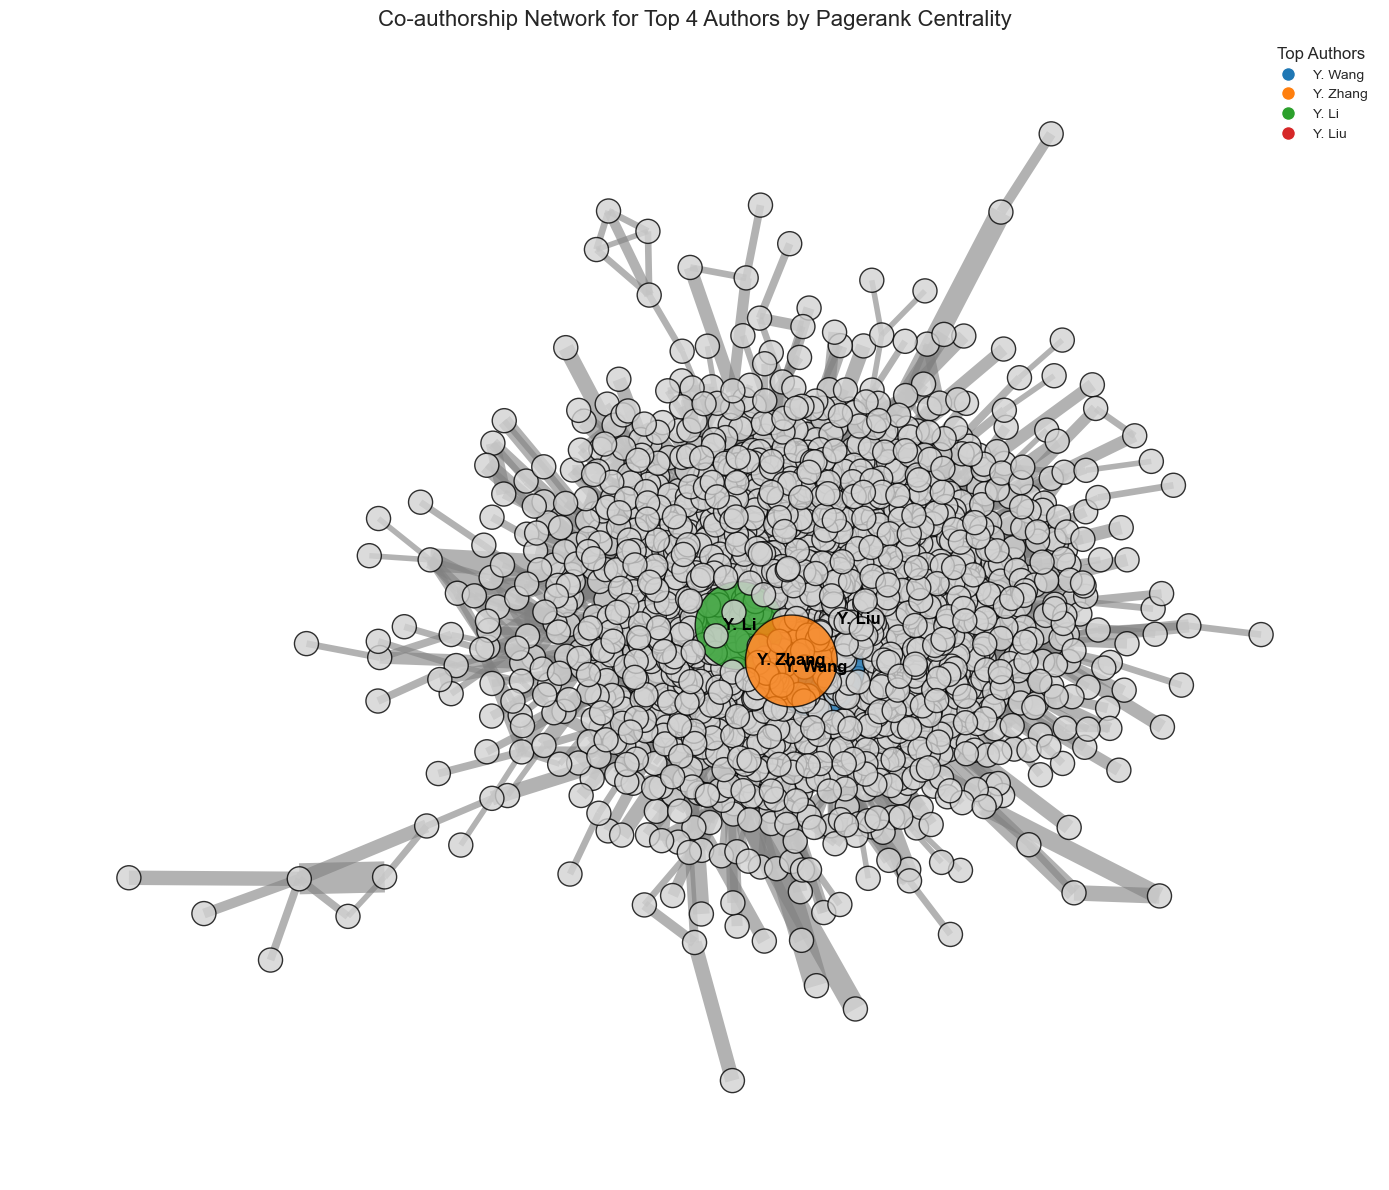


Subgraph statistics:
Number of nodes (authors): 2767
Number of edges (collaborations): 17536
Average number of connections for top authors: 481.25


In [27]:
# Visualize the top 4 authors' network based on PageRank centrality
top_author_subgraph = visualize_top_authors_network(
    graph=graph,                 # Your full co-authorship network
    centrality_data=influence,     # The centrality data you calculated
    metric='pagerank',            # You can use 'pagerank', 'degree', or 'eigenvector'
    top_n=4,                      # Number of top authors to focus on
    degree_threshold=5,           # Only include connections with at least 5 collaborations
    node_size_multiplier=5000,    # Adjust node sizes
    figsize=(14, 12)              # Figure dimensions
)

# Using all authors is too dense

I think there are possibly a couple of issues. 

* Initial(s) + last names may not have enough specificity. 
* There are just too many authors.

Will try to build a network with just the last author names. 

In [35]:
# Get last authors and paper count
last_authors = extract_position_authors(clean_df, position='last')
print(last_authors)

Extracting last authors: 100%|██████████| 136160/136160 [00:04<00:00, 29193.52it/s]

{'T. Walsh': 44, 'U. Trinchero': 1, 'L. A. Hermens': 1, 'A. Schaerf': 2, 'L. B. Holder': 1, 'A. M. Segre': 1, 'M. J. Pazzani': 1, 'P. F. Patel-Schneider': 1, 'J.D. Moore': 2, 'G. Ritchie': 2, 'U. Schäfer': 1, 'V. Weber': 2, 'G. Smolka': 1, 'M. Kesseler': 1, 'R. Sproat': 8, 'M. Palmer': 4, 'S. Sutton': 1, 'D. Bridge': 1, 'S.P. Spackman': 1, 'J. Matiasek': 1, 'D. Moran': 2, 'Y. Lee': 15, 'B. Lyberg': 1, 'P. Price': 1, 'J.F. Allen': 4, 'J. Carson-Berndsen': 1, 'M. Steedman': 14, 'O. Rambow': 13, 'M. Stede': 3, 'W.A. Gale': 2, 'K. Church': 6, 'A. Waibel': 29, 'I. Kuruoz': 1, 'I. Chander': 1, 'S.K. Luk': 1, 'D. Koller': 22, 'M. Hara': 1, 'S. Salzberg': 1, 'P.J. King': 1, 'M. Crocker': 1, 'G. Russell': 1, 'K.R. McKeown': 4, 'A. Voutilainen': 3, 'L. Lee': 32, 'D. Carter': 4, 'K.P. Eiselt': 1, 'J.K. Holbrook': 1, 'K. Mahesh': 1, 'M. Tennenholtz': 9, 'K. Yamada': 2, 'M. Dras': 4, 'V. Akman': 2, 'S.M. Omohundro': 1, 'K. McKeown': 27, 'P. Plamondon': 1, 'C.J. Pollard': 1, 'A. Joshi': 14, 'D. Cutt

In [36]:
#Create a subgraph focused on last authors from your existing network
last_author_network = create_position_focused_subgraph(
    graph,  # Your existing full network 
    last_authors,
    min_papers=5     # Include authors who appear as last author in at least 5 papers
)

In [37]:
#Analyze the last author network
analyze_position_network(last_author_network, last_authors, position='last')


Note: Graph is disconnected, calculating eigenvector centrality for the largest component only.

Top 20 last authors by number of papers:
1. Y. Wang: 400 papers
2. Y. Zhang: 364 papers
3. H. Li: 313 papers
4. Y. Liu: 306 papers
5. H. Wang: 253 papers
6. X. Wang: 249 papers
7. X. Li: 249 papers
8. Y. Li: 247 papers
9. Y. Yang: 224 papers
10. Y. Chen: 221 papers
11. J. Wang: 220 papers
12. D. Tao: 211 papers
13. C. Zhang: 209 papers
14. J. Li: 204 papers
15. Z. Wang: 203 papers
16. L. Zhang: 202 papers
17. L. Wang: 201 papers
18. T. Liu: 194 papers
19. Y. Bengio: 193 papers
20. J. Liu: 185 papers

Top last authors by degree centrality (most connections):
1. Y. Wang: 0.2529 (appears as last author in 400 papers)
2. Y. Li: 0.2500 (appears as last author in 247 papers)
3. Y. Zhang: 0.2408 (appears as last author in 364 papers)
4. Y. Liu: 0.2216 (appears as last author in 306 papers)
5. Z. Wang: 0.2161 (appears as last author in 203 papers)
6. X. Wang: 0.2118 (appears as last author in 249 

Calculating network layout...


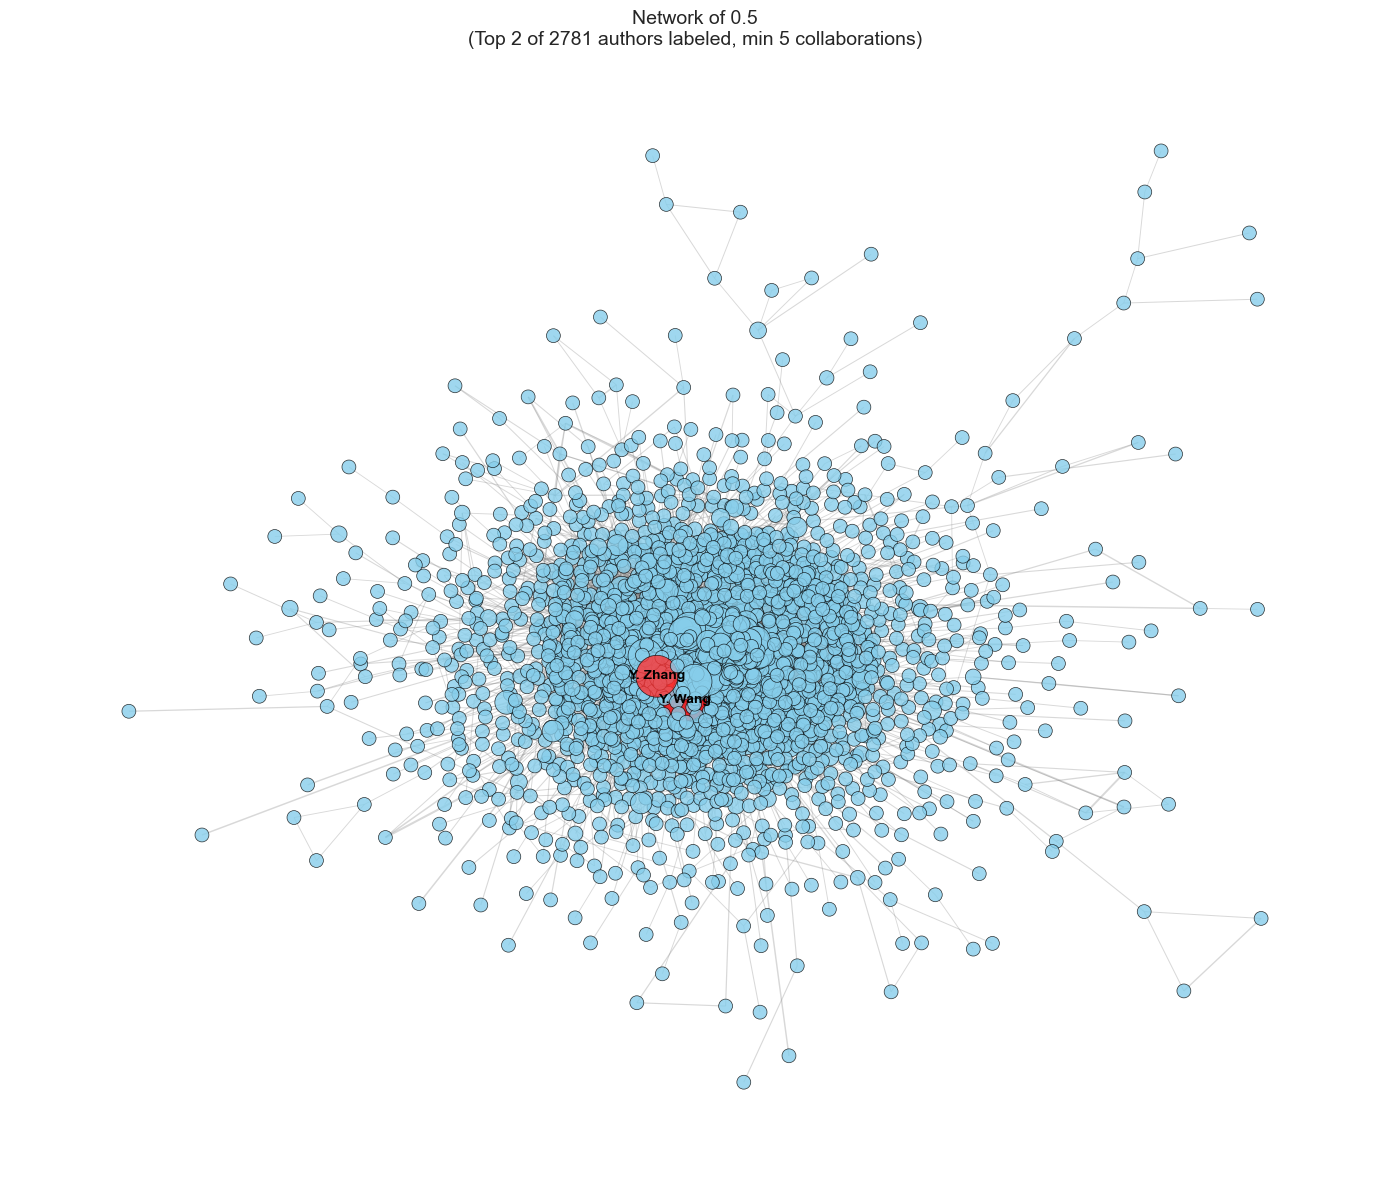


Visualization statistics:
Showing 2781 authors with 16346 connections
Filtered out 2436 isolated authors
Minimum edge weight: 5 collaborations
Labeled the top 2 authors


In [40]:
# Visualize the last author network
visualize_position_network(
    last_author_network, 
    last_authors,
    position='last',
    top_n=2,             # Label top 2 last authors
    min_edge_weight=5     # Show connections with at least 5 collaborations
)